<a href="https://colab.research.google.com/github/Naveenrod/Big-Data-Analytics-3803-ICT/blob/main/Week%208/Detectron2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object detection with Detectron2

![](https://cdn.ps.emap.com/wp-content/uploads/sites/3/2017/12/Oxford_Street.jpg)

## 1) Install detectron2 (if running on Colab with GPU enabled)

Check torch and cuda version then install the correponding pre-built detectron2: https://detectron2.readthedocs.io/en/latest/tutorials/install.html

In [1]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

2.0.0+cu118 True
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [6]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
# !python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-6waj6015
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-6waj6015
  Resolved https://github.com/facebookresearch/detectron2.git to commit d4a5f28e01b2babbaba9f90198fb95f5c661cccd
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filena

## 2) Install detectron2 in local (if not using Colab)

Install Detectron2 in Windows, Linux with Anaconda and GPU-enabled:

https://medium.com/@yogeshkumarpilli/how-to-install-detectron2-on-windows-10-or-11-2021-aug-with-the-latest-build-v0-5-c7333909676f

https://medium.com/@sujoydebnath.92/installing-detectron2-with-anaconda-and-cuda-on-linux-7b710663326c

https://anaconda.org/conda-forge/detectron2 


Installing Detectron2 natively for Mac M1 Pro / Apple silicon (use Miniforge) (tested):

https://medium.com/@hakon.hukkelas/installing-detectron2-natively-for-mac-m1-pro-apple-silicon-a89517f1c913 

## 3) Inference with pre-trained model

#### Import packages

In [7]:
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt
import cv2

We first need to download a image to make predictions on.

In [8]:
# !wget https://cdn.ps.emap.com/wp-content/uploads/sites/3/2017/12/Oxford_Street.jpg -O oxford_street.jpg
import requests

image_url = "https://cdn.ps.emap.com/wp-content/uploads/sites/3/2017/12/Oxford_Street.jpg"
img_data = requests.get(image_url).content
with open('oxford_street.jpg', 'wb') as handler:
    handler.write(img_data)

import os
os.stat('oxford_street.jpg')

os.stat_result(st_mode=33188, st_ino=4718776, st_dev=52, st_nlink=1, st_uid=0, st_gid=0, st_size=179209, st_atime=1683896192, st_mtime=1683896192, st_ctime=1683896192)

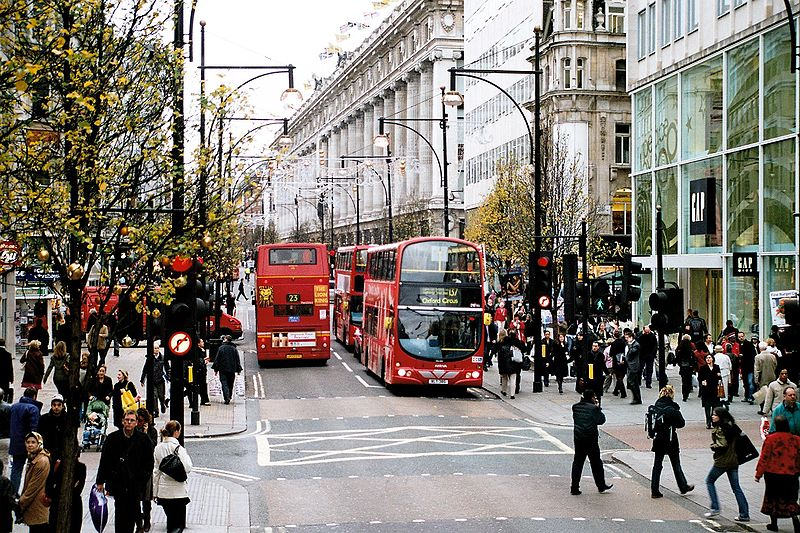

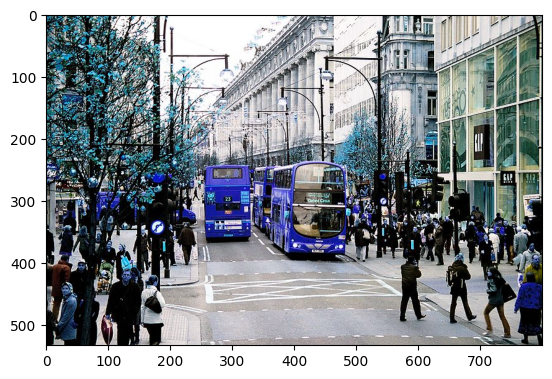

In [10]:
%matplotlib inline
im = cv2.imread("./oxford_street.jpg")
plt.imshow(im)

from IPython.display import Image
Image(filename='oxford_street.jpg') 

#### Import the model and the config

Your turn to work now ! 

- for example, you can choose Faster_rcnn pretrained (its signature is `"COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"` in the detectron model zoo)

In [11]:
# Create config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.DEVICE = 'cpu'

In [12]:
# Generate model and Create predictor
predictor = DefaultPredictor(cfg)

model_final_f6e8b1.pkl: 243MB [00:01, 199MB/s]                           


In [13]:
# Make prediction
outputs = predictor(im)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


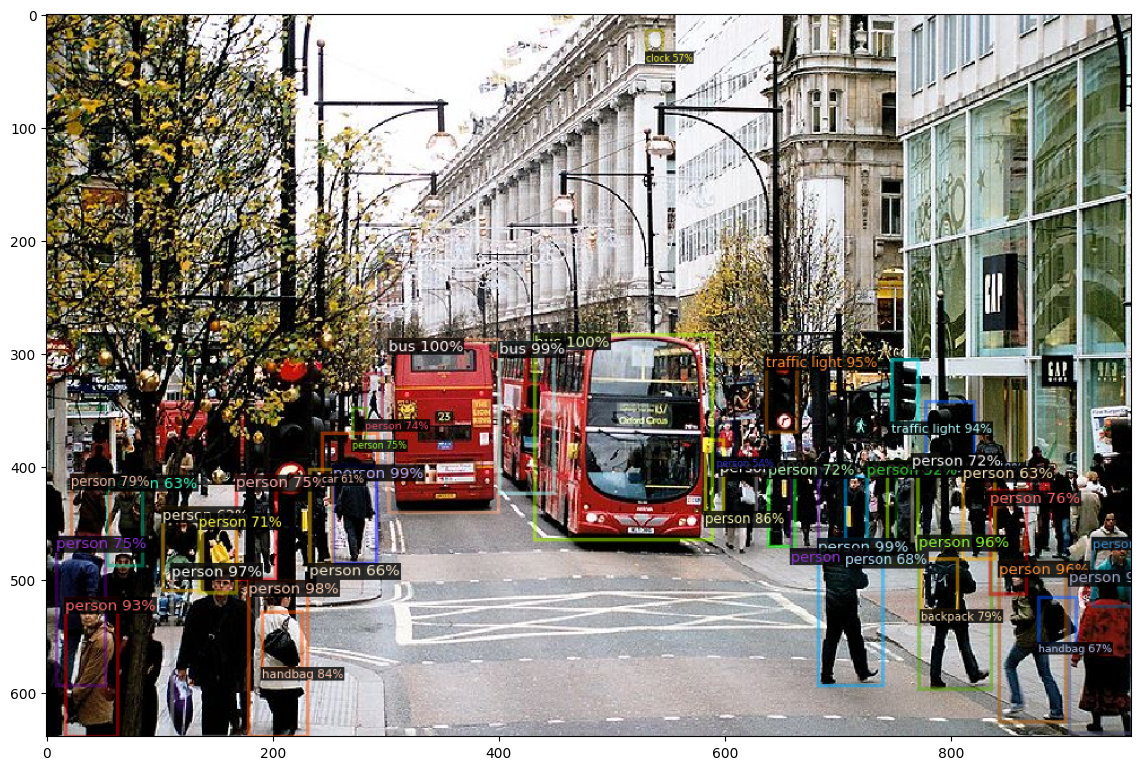

In [16]:
# Visualize the bounding boxes on the image
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

**\[BONUS\]** Feel free to :
- Test the faster-RNN we just used on other images of your choosing
- Test some of the other algorithms available in the [model zoo](https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md) and see how they perform